In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix
import gradio as gr
import warnings
warnings.filterwarnings('ignore')



In [2]:
data=pd.read_csv(r"Most Streamed Spotify Songs 2024.csv",encoding="latin1")
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


# EDA(Exploratory Data Analysis)

In [3]:
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [4]:
data.tail()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,4/11/2017,USB271700107,"4,593",19.4,"255,740,653","32,138","14,066,526",...,NaN,4.0,"127,479",4.0,"69,006,739","11,320",NaN,"767,006",NaN,1


In [5]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [6]:
data.isna().sum()


Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [7]:
data.describe(include='all')


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
count,4600,4600,4595,4600,4600,4600,4600.000000,4487,4530,4528,...,2477,3679.000000,3672,3545.000000,3494,3332,1267,4023,0.0,4600.000000
unique,4370,4005,1999,1562,4598,4577,NaN,4425,4207,4478,...,689,NaN,3558,NaN,3491,2975,1265,4002,NaN,NaN
top,Danza Kuduro - Cover,Un Verano Sin Ti,Taylor Swift,1/1/2012,TCAGJ2289254,355,NaN,"1,655,575,417",1,3,...,1,NaN,"1,097",NaN,"56,972,562",9,27,1,NaN,NaN
freq,13,20,63,38,2,2,NaN,4,46,8,...,54,NaN,17,NaN,2,6,2,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,41.844043,NaN,NaN,NaN,...,NaN,32.310954,NaN,25.348942,NaN,NaN,NaN,NaN,NaN,0.358913
std,NaN,NaN,NaN,NaN,NaN,NaN,38.543766,NaN,NaN,NaN,...,NaN,54.274538,NaN,25.989826,NaN,NaN,NaN,NaN,NaN,0.479734
min,NaN,NaN,NaN,NaN,NaN,NaN,19.400000,NaN,NaN,NaN,...,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,23.300000,NaN,NaN,NaN,...,NaN,5.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.900000,NaN,NaN,NaN,...,NaN,15.000000,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,44.425000,NaN,NaN,NaN,...,NaN,37.000000,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [8]:
data.duplicated().any()

np.True_

In [9]:
data.duplicated().sum()

np.int64(2)

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().any()

np.False_

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [13]:
data.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

# Visualizing Using Matplotlib

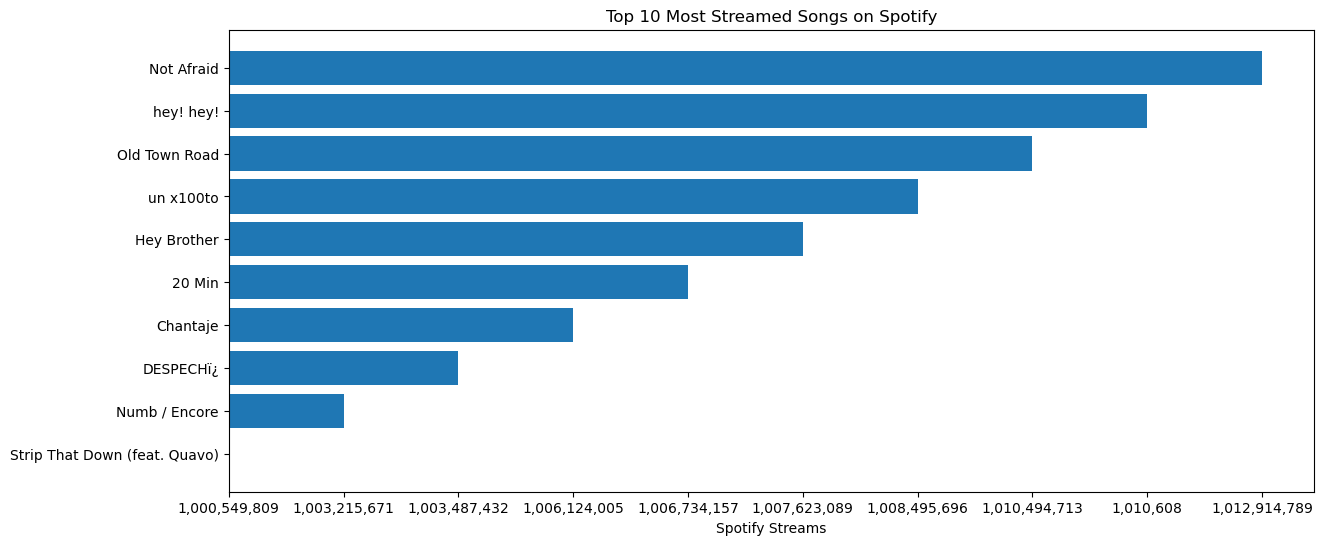

In [14]:
plt.figure(figsize=(14,6))
group=data.groupby('Spotify Streams')
grouped=group[["Spotify Streams","Track"]].max()
getdata=pd.DataFrame(grouped)
getdata
x=getdata["Track"].head(10)
y=getdata['Spotify Streams'].head(10)

plt.barh(x,y)
plt.xlabel("Spotify Streams")
plt.title("Top 10 Most Streamed Songs on Spotify")
plt.show()

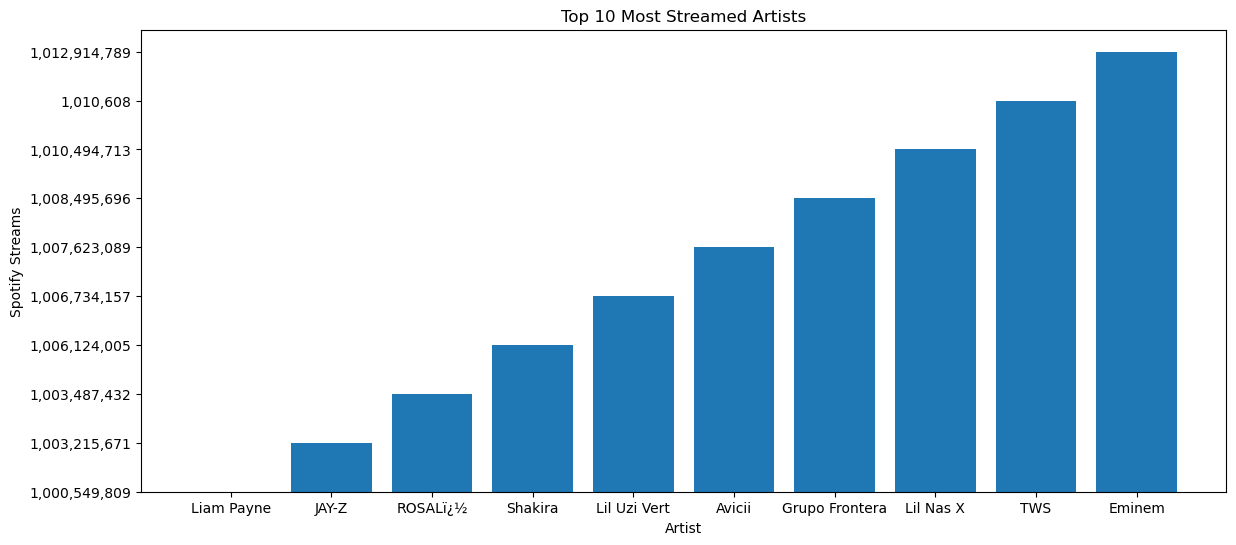

In [15]:


plt.figure(figsize=(14,6))
group=data.groupby('Spotify Streams')
grouped=group[["Spotify Streams","Artist"]].max()
getdata=pd.DataFrame(grouped)
getdata
x=getdata["Artist"].head(10)
y=getdata['Spotify Streams'].head(10)

plt.bar(x,y)
plt.xlabel("Artist")
plt.ylabel('Spotify Streams')
plt.title("Top 10 Most Streamed Artists")
plt.show()

# Representing the correlation of data values Graphichally

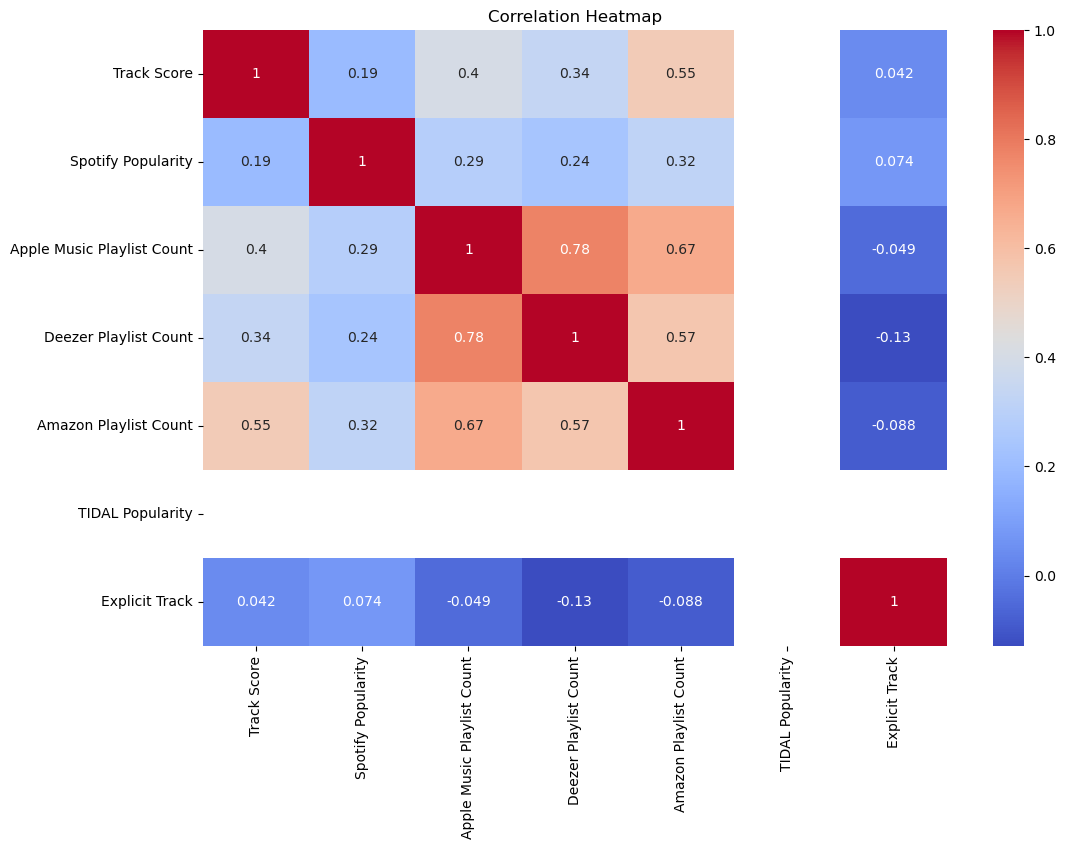

In [16]:
numeric_data = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
data.drop( ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC','TIDAL Popularity'],inplace=True,axis=1,errors='ignore')

data

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747","1,397,590","48,370","20,202,000",...,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",1
4596,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245","5,347,766",NaN,"1,721",...,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",0
4597,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333","1,081,402","7,596","5,288,677",...,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",1
4598,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159","3,868,828","11,433","2,534,831",...,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   All Time Rank               4598 non-null   object 
 1   Track Score                 4598 non-null   float64
 2   Spotify Streams             4485 non-null   object 
 3   Spotify Playlist Count      4528 non-null   object 
 4   Spotify Playlist Reach      4526 non-null   object 
 5   Spotify Popularity          3794 non-null   float64
 6   YouTube Views               4290 non-null   object 
 7   YouTube Likes               4283 non-null   object 
 8   TikTok Posts                3425 non-null   object 
 9   TikTok Likes                3618 non-null   object 
 10  TikTok Views                3617 non-null   object 
 11  YouTube Playlist Reach      3589 non-null   object 
 12  Apple Music Playlist Count  4037 non-null   float64
 13  AirPlay Spins               4100 non-n

In [19]:
obj_cols = data.select_dtypes(include='object').columns
obj_cols


Index(['All Time Rank', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
       'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts'],
      dtype='object')

In [20]:
for col in obj_cols:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("-", "0", regex=False)
        .str.replace(" ", "", regex=False)
    )

    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.median(numeric_only=True))

In [21]:
data.isna().sum()


All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
dtype: int64

In [22]:
threshold = data["Spotify Streams"].median()
data["popular"] = (data["Spotify Streams"] >= threshold).astype(int)


In [23]:
x = data.drop(['Spotify Streams', 'popular'], axis=1)
y=data['popular']
data
print(y.value_counts())


popular
1    2356
0    2242
Name: count, dtype: int64


In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [25]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)

Logistic Accuracy: 0.8684782608695653
Logistic Training_Accuracy: 0.8752039151712887
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       466
           1       0.89      0.84      0.86       454

    accuracy                           0.87       920
   macro avg       0.87      0.87      0.87       920
weighted avg       0.87      0.87      0.87       920

[[418  48]
 [ 73 381]]


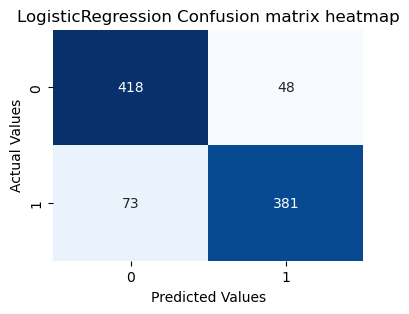

In [26]:
log = LogisticRegression(max_iter=500)
log.fit(xtrain_scaled, ytrain)

ypred = log.predict(xtest_scaled)
xpred = log.predict(xtrain_scaled)
print("Logistic Accuracy:", accuracy_score(ytest, ypred))
print("Logistic Training_Accuracy:", accuracy_score(ytrain, xpred))
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))
cm=confusion_matrix(ytest, ypred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("LogisticRegression Confusion matrix heatmap")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

XGBoost Testing_Accuracy: 0.9228260869565217
XGBoost Training_Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       466
           1       0.92      0.93      0.92       454

    accuracy                           0.92       920
   macro avg       0.92      0.92      0.92       920
weighted avg       0.92      0.92      0.92       920

[[418  48]
 [ 73 381]]


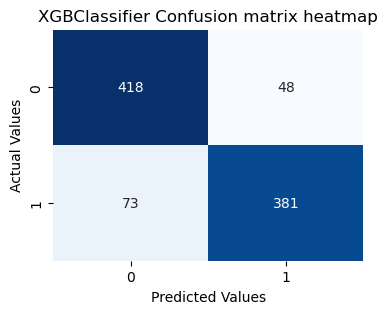

In [27]:
xgb = XGBClassifier(
  n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)
xgb.fit(xtrain, ytrain)
y_pred = xgb.predict(xtest)  
x_pred = xgb.predict(xtrain)  
print("XGBoost Testing_Accuracy:", accuracy_score(ytest, y_pred))
print("XGBoost Training_Accuracy:", accuracy_score(ytrain, x_pred))
print(classification_report(ytest, y_pred))
print(confusion_matrix(ytest, ypred))
cm=confusion_matrix(ytest, ypred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBClassifier Confusion matrix heatmap")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


 TestingAccuracy: 0.9119565217391304
training Score: 1.0

Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       466
           1       0.92      0.90      0.91       454

    accuracy                           0.91       920
   macro avg       0.91      0.91      0.91       920
weighted avg       0.91      0.91      0.91       920



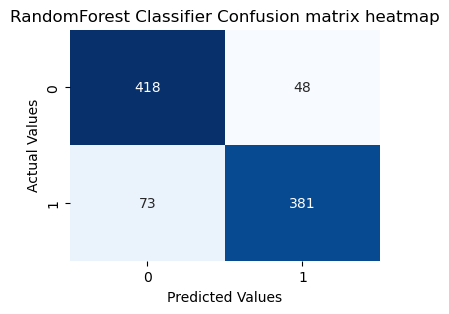

In [28]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
     n_jobs=-1,
    random_state=42
)

rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
x_pred = xgb.predict(xtrain) 
print("\n TestingAccuracy:", accuracy_score(ytest, rf_pred))
print("training Score:", accuracy_score(ytrain, x_pred))
print("\nClassification Report (RandomForest):\n", classification_report(ytest, rf_pred))
cm=confusion_matrix(ytest, ypred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("RandomForest Classifier Confusion matrix heatmap")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

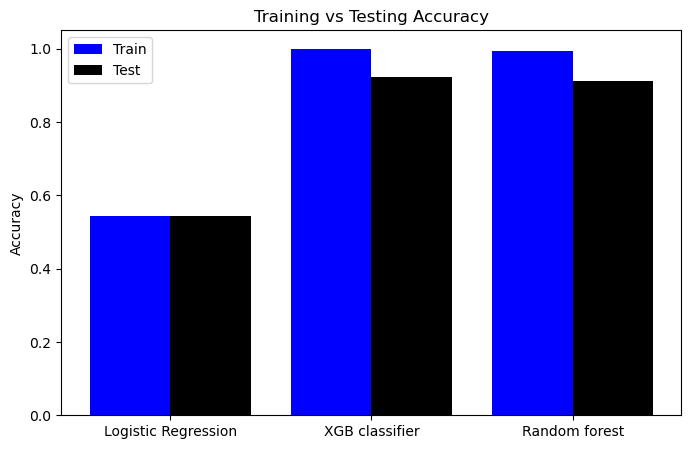

In [29]:
models =["Logistic Regression","XGB classifier","Random forest"]
train_score=[log.score(xtrain, ytrain),xgb.score(xtrain, ytrain),rf.score(xtrain, ytrain)]
testing_score=[log.score(xtest, ytest),xgb.score(xtest, ytest),rf.score(xtest, ytest)]
x = np.arange(len(models))
plt.figure(figsize=(8,5))
plt.bar(x - 0.2, train_score, 0.4, label='Train', color='blue')
plt.bar(x + 0.2, testing_score, 0.4, label='Test', color='black')
plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()

In [32]:
X = data.drop(["popular", "Spotify Streams"], axis=1)
y = data["popular"]

In [33]:
def predict_popularity(
    all_time_rank, track_score, playlist_count, playlist_reach, spotify_popularity,
    youtube_views, youtube_likes, tiktok_posts, tiktok_likes, tiktok_views,
    yt_playlist_reach, apple_music_count, airplay_spins, sirius_spins,
    deezer_count, deezer_reach, amazon_count, pandora_streams,
    pandora_stations, soundcloud_streams, shazam_counts, explicit_track
):
    
    try:
        
        input_data = pd.DataFrame([[
            all_time_rank, track_score, playlist_count, playlist_reach, spotify_popularity,
            youtube_views, youtube_likes, tiktok_posts, tiktok_likes, tiktok_views,
            yt_playlist_reach, apple_music_count, airplay_spins, sirius_spins,
            deezer_count, deezer_reach, amazon_count, pandora_streams,
            pandora_stations, soundcloud_streams, shazam_counts, explicit_track
        ]], columns=x.columns)

       
        pred = xgb.predict(input_data)[0]
        label = "Popular Song" if pred == 1 else "Not Popular Song"
        return label

    except Exception as e:
        return f"Error: {str(e)}"


In [34]:
iface = gr.Interface(
    fn=predict_popularity,
    inputs=[
        gr.Number(label="All Time Rank"),
        gr.Number(label="Track Score"),
        gr.Number(label="Spotify Playlist Count"),
        gr.Number(label="Spotify Playlist Reach"),
        gr.Number(label="Spotify Popularity"),
        gr.Number(label="YouTube Views"),
        gr.Number(label="YouTube Likes"),
        gr.Number(label="TikTok Posts"),
        gr.Number(label="TikTok Likes"),
        gr.Number(label="TikTok Views"),
        gr.Number(label="YouTube Playlist Reach"),
        gr.Number(label="Apple Music Playlist Count"),
        gr.Number(label="AirPlay Spins"),
        gr.Number(label="SiriusXM Spins"),
        gr.Number(label="Deezer Playlist Count"),
        gr.Number(label="Deezer Playlist Reach"),
        gr.Number(label="Amazon Playlist Count"),
        gr.Number(label="Pandora Streams"),
        gr.Number(label="Pandora Track Stations"),
        gr.Number(label="Soundcloud Streams"),
        gr.Number(label="Shazam Counts"),
        gr.Number(label="Explicit Track (0 or 1)")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Spotify Song Popularity Predictor",
    description="Enter song metrics to predict if it will be popular."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
